# Introduction to Machine Learning: Models & Algorithms
## Supervised Learning

# Part 1: The theory of ML

We have $(X, y)$

We want $\hat{f}$ 

So that we can $\hat{y} = \hat{f}(X)$


---

If $y \in \mathbb{R}$, then Regression


If $y \in \{"LabelOne", "LabelTwo", \dots\}$, then Classification

## How do Machines Find $\hat{f}$ ?

Broadly, we have $\mathcal{A}( (X, y); h_{\dots})$

Ie., an algorithm (A) which takes, as input, the historical data and addition parameters $h$.

This algorithm *outputs* the model $\hat{f}$

$(X, y) \rightarrow \mathcal{A} \rightarrow \hat{f}$

## What is a Model?

$\hat{f}$ is the model. It's any relationship which can compute a $y$ from $X$. 

In machine learning $\hat{f}$ is often derived from $X$ without any explicit assumptions about the "underlying reality" of $X$. 

Routinely we basically just "brute force" our way to $\hat{f}$.

### What is a Statistical Model?

A statistical model is sometimes defined to be a claim about the data generating process behind $X$. 

In [1]:
import numpy as np

$X_{Temp} \sim \mathcal{N}(21, 2)$

In [221]:
temp = np.random.normal(21, 2, 10) 
temp

array([21.24227321, 24.79794846, 20.90292719, 20.58760948, 24.17336307,
       19.50742825, 21.80322663, 21.7999674 , 20.23927695, 21.79149276])

There is a process which generates *temperature*, this process is "really" governed by just a couple of parameters (mean, std).

The room *really* is 21C, the measurement process introduces some level of error which gives rise to the particular random variations we see. 

## What is an algorithm?

The general meaning of *algorithm* is: any sequence of actions (derived from a set of possible actions).

Eg., 

In [5]:
actions = {"JUMP", "SIT", "TWIRL"}

In [6]:
actions

{'JUMP', 'SIT', 'TWIRL'}

In [7]:
program = [
    "JUMP",
    "SIT",
    "JUMP",
    "TWIRL"
]

In [8]:
program

['JUMP', 'SIT', 'JUMP', 'TWIRL']

To run the program we *interpret* each token as corresponding to some *action*. 

### What are algorithms on digital computers?

In [10]:
digital_actions = {'ADD', 'MULTIPY', }

### What are machine learning algorithms?

A sequencing of digital computer actions which process $(X,y)$ produce a relationship $\hat{f}$. 

## What are the key algorithm types?

Many machine learning practicioners misunderstand "parametric" thinking it applies to $\hat{f}$. 

In statistics parameteric *means* that we are *modelling* the data generating process by use of some parameters, eg., a mean.

A parameteric method is then on where we assume something about the origins of the data. 

* parameteric method
    * we assume a shape before we begin
    * eg., linear regression -- we assume the data follows a straight line
    * $P(y_i|x) \sim \mathcal{N}(\mu_i, \sigma)$
* non-parameteric
    * we don't assume anything about the shape
    * this is essentially a non-statistical process
        * often looks "hacky"

##### Aside: Linear Regression assumes each data point is normally distributed

In [236]:
xs = [1, 2, 3]
ys = np.row_stack([
    np.random.normal(x[0], 0.05), 
    np.random.normal(x[1], 0.05), 
    np.random.normal(x[2], 0.05)
])

In [238]:
ys

array([[0.99503851],
       [1.98216605],
       [3.04597401]])

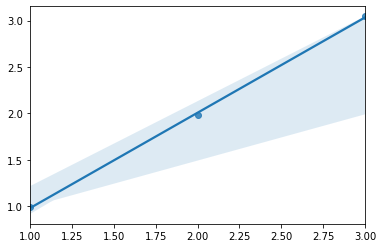

In [239]:
import seaborn as sns
sns.regplot(x=xs, y=ys)


# Part 2: Algorithms

In [24]:
import seaborn as sns

In [31]:
cars = sns.load_dataset('car_crashes')

In [32]:
cars.sample()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
15,15.7,2.669,3.925,15.229,13.659,649.06,114.47,IA


## How do we solve machine learning problems in python?

In [19]:
import sklearn

We import the *estimator* from the `sklearn` package,

In [59]:
from sklearn.linear_model import LinearRegression # this allows us to ditch the lib. name

Which provides the algorithm as `.fit()` and we can access the model as `.predict()`,

In [23]:
lm = LinearRegression() # creates the mechanism "estimator"

###### We choose $(X,y)$

In [34]:
features = ['alcohol']
target = 'speeding'

X = cars[features]
y = cars[target]

###### The algorithm processes $(X,y)$, "learning"

In [35]:
lm.fit(X, y)

LinearRegression()

###### We use the prediction model  $\hat{f}$, `.predict`

In [50]:
lm.predict([[2]])

array([2.74216526])

###### Aside: how do I see the coeffs?

sklearn makes the *prediction model parameters* available as `.param_`,

In [54]:
lm.coef_

array([0.78150308])

In [55]:
lm.intercept_

1.1791591095991114

, the convention is sklearn is `.name_` is some piece of the underlying piece of the mathematics.

----

#### Aside: let's have a quick look at what the ranges are for X,y

In [41]:
y.quantile([.25, .50, .75])

0.25    3.7665
0.50    4.6080
0.75    6.4390
Name: speeding, dtype: float64

In [39]:
X.quantile([.25, .50, .75])

,alcohol
0.25,3.894
0.50,4.554
0.75,5.604


### Aside,

##### Let's visualize the model,

In [47]:
yhat = lm.predict([
    [0],
    [3],
    [4],
    [5],
    [10]
])

yhat

array([1.17915911, 3.52366834, 4.30517141, 5.08667449, 8.99418986])

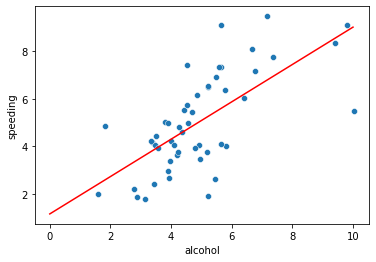

In [49]:
sns.scatterplot(x=cars['alcohol'], y=cars['speeding'])
sns.lineplot(x=[0, 3, 4, 5, 10], y=yhat, color="red")

## Roughly, How do Machine Learn?


A good first-pass understanding of how machines find models is to assume they start at random,

In [85]:
xs = np.arange(0, 10, 1); xs

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

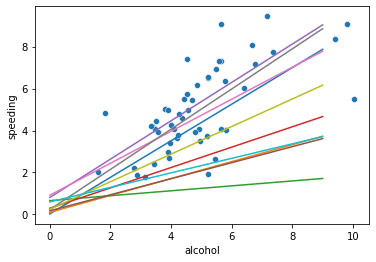

In [84]:
sns.scatterplot(x=cars['alcohol'], y=cars['speeding'])

for _ in range(10):
    y_rand1 = np.random.uniform(0, 1) * xs + np.random.uniform(0, 1)
    sns.lineplot(x=xs, y=y_rand1)
    
    

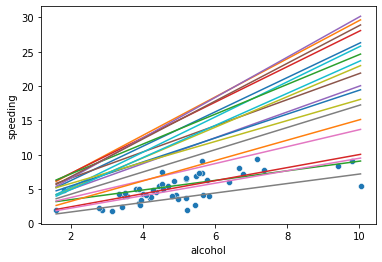

In [125]:
# plotting the historical cases
sns.scatterplot(x=cars['alcohol'], y=cars['speeding'])



# keep track of all our random attempts

guesses = []

# consider these xs, and compute random ys
xs = cars['alcohol']

# repeat 20 times
for _ in range(20):
    
    # generate a single random slope value
    slope     = np.random.uniform(0, 3)
    
    # generate a single random intercept
    intercept = np.random.uniform(0, 3)
    
    # generate a random set of ys from the above
    y_rand =  slope * xs + intercept
    
    
    # ie., an error per attempt
    total_loss = abs(cars['speeding'] - y_rand).mean()
    
    # we track:  
    guesses.append( (total_loss, slope, intercept ) )
    
    # draw the attempt
    sns.lineplot(x=xs, y=y_rand)
    
    

The `min` function in python reports the minimum entry. If a list contains tuples, ie., its basically a table, it will report the row with minimum first col,

In [128]:
# guesses

In [129]:
best = min(guesses)
best

(1.1825438119721325, 0.9501360545258105, 0.5194314396587748)

In [130]:
best_slope = best[1]
best_intercept = best[2]

In [131]:
best_slope, best_intercept

(0.9501360545258105, 0.5194314396587748)

In [132]:
lm.coef_

array([0.78150308])

In [133]:
lm.intercept_

1.1791591095991114

## How do Machines solve  Regression problems?

General approaches to regression in machine learning use *gradient descent*.

You make a random first-guess, and then review how close your guess was. If your guess is far above, you lower your slope and intercept; if it's far below, your raise it. 

You keep iterating this process until your answers are stable. 

## Non-Parametric Examples

### What is Nearest Neighbors?

The k-Nearest Neighbors algorithm *remembers* all of its training input. The prediction function is just a look-up in this database...

###### The fitting step,

We save the entire dataset, here just into the variable, `db`,

In [210]:
X_speeding = cars['speeding']
y_alcohol  = cars['alcohol']

In [212]:
db = (X_speeding, y_alcohol ) #all done

###### The prediction step,

We havea new point come along, for which we do not know their $y$,

In [143]:
X_new = 3

We go to our database and find the $k$ closest points in $X$, ie., here the three people with a speeding value close to $X_new$,

In [213]:
k_near_points = ((X_speeding - X_new) ** 2).nsmallest(5)

Now that we know the *three most similar people* (according to `speeding`), we look up their `alcohol` level,

In [215]:
yhat_alcohol = y_alcohol[k_near_points.index].mean()

In [216]:
yhat_alcohol

4.4394

Our prediction is just the mean of their historical $y$.

##### Aside: SQL

```sql
SELECT AVG(y)
FROM db
ORDER BY ABS(db.x - x_new) 
LIMIT k
```

```sql

SELECT AVG(alcohol)
FROM cars
ORDER BY ABS(speeding - 3)
LIMIT 5
```

### k-Nearest Neighbors for Classification

If its classification we take the modal value, ie., the most common $y$ in our sample of nearby $k$ points. 

In [217]:
tips = sns.load_dataset('tips')

X_bill = tips['total_bill']
y_day = tips['day']

In [218]:
k_bill_points = abs(X_bill - 10).nsmallest(5)

In [219]:
y_hat = y_day[k_bill_points.index].mode()

In [220]:
y_hat

0    Thur
Name: day, dtype: category
Categories (4, object): [Thur, Fri, Sat, Sun]

## k-Nearest Neighbors in sklearn

Import,

In [195]:
from sklearn.neighbors import KNeighborsClassifier

Choose $(X, y)$,

In [189]:
ti = sns.load_dataset('titanic').drop(columns=['deck']).dropna()
X = ti[['age', 'fare']]
y = ti['survived']

Create the "estimator",

In [190]:
k = 5

knn = KNeighborsClassifier(k)

`.fit()`,

In [191]:
knn.fit(X, y) # just remembers X,y

KNeighborsClassifier()

`.predict()`,

In [192]:
knn.predict([
    [10, 50],
    [20, 50],
])

array([0, 1], dtype=int64)

## Exercise ( 20 min )

HINT: `tips = sns.load_dataset('tips')`

* Using the `tips` dataset, perform 
    * a classification using kNN and 
        * choose `X = tips[['total_bill', 'tip']]`
        * choose `y = tips['sex']`
        * or any other suitable cols
        * `from sklearn.neighbors import KNeighborsClassifier`
        * Create the knn model
            * knn = ...
        * Call `.fit()` on your data
        * Call `.predict()`
            * **IMPORTANT**:
                * input into `.predict()` has to be matrix-shaped
                * `[  [10, 1]  ]`
                    * ie., you need rows and cols

    * EXTRA: a regression using LinearRegression
        * import the linear regression model
        * predict `tip` from `total_bill` and party `size`

In [240]:
tips = sns.load_dataset('tips')

In [241]:
X = tips[['total_bill', 'tip']]

In [242]:
y = tips['sex']

In [243]:
from sklearn.neighbors import KNeighborsClassifier

In [244]:
knn = KNeighborsClassifier().fit(X, y)

In [247]:
knn.predict([
    [0, 0],
    [10, 1],
    [10, 2],
    [40, 4],
    [40, 10],
])

array(['Female', 'Male', 'Female', 'Male', 'Male'], dtype=object)